In [14]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, SparsePCA, FactorAnalysis

pd.set_option('display.max_columns', None)
#cities_10记录了十个沿海省份的经济指标，通过降维方法对各省、市经济发展情况评估
'''变量 	含义
AREA 	地区
X1 	GDP
X2 	人均GDP
X3 	工业增加值
X4 	第三产业增加值
X5 	固定资产投资
X6 	基本建设投资
X7 	社会消费品零售总额
X8 	海关出口总额
X9 	地方财政收入'''

'变量 \t含义\nAREA \t地区\nX1 \tGDP\nX2 \t人均GDP\nX3 \t工业增加值\nX4 \t第三产业增加值\nX5 \t固定资产投资\nX6 \t基本建设投资\nX7 \t社会消费品零售总额\nX8 \t海关出口总额\nX9 \t地方财政收入'

In [15]:
#导入数据
cities = pd.read_csv("cities_10.csv", encoding='gbk')
cities

,Unnamed: 0,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7
1,1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2
2,2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3
3,3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8
4,4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7
5,5,上海,5408.8,40627,2196.2,2755.8,1970.2,779.3,2035.2,320.5,709.0
6,6,浙江,7670.0,16570,2356.5,3065.0,2296.6,1180.6,2877.5,294.2,566.9
7,7,福建,4682.0,13510,1047.1,1859.0,964.5,397.9,1663.3,173.7,272.9
8,8,广东,11769.7,15030,4224.6,4793.6,3022.9,1275.5,5013.6,1843.7,1201.6
9,9,广西,2455.4,5062,367.0,995.7,542.2,352.7,1025.5,15.1,186.7


In [16]:
cities.loc[:, 'X1':].corr(method='pearson').head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
X1,1.000000,-0.094292,0.966506,0.979238,0.922984,0.921680,0.941148,0.637458,0.825568
X2,-0.094292,1.000000,0.112726,0.074167,0.214052,0.093483,-0.042776,0.081195,0.273145
X3,0.966506,0.112726,1.000000,0.985373,0.963159,0.939194,0.935196,0.704714,0.898016
X4,0.979238,0.074167,0.985373,1.000000,0.972862,0.939720,0.962267,0.713890,0.913364
X5,0.922984,0.214052,0.963159,0.972862,1.000000,0.971337,0.937109,0.716722,0.934549


In [17]:
#主成分分析（预先进行标准化）
from sklearn.preprocessing import scale, StandardScaler
n_components = 2

ss = StandardScaler()
scale_cities = ss.fit_transform(cities.ix[:, 'X1':])

pca = PCA(n_components=n_components)
pca.fit(scale_cities)
pca.explained_variance_ratio_

D:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
D:\Users\Anaconda3\lib\site-packages\pandas\core\indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)


array([0.80112955, 0.12214932])

In [18]:
pd.DataFrame(pca.components_)

,0,1,2,3,4,5,6,7,8
0,0.353682,0.040555,0.364148,0.367584,0.365917,0.352119,0.364419,0.297565,0.355405
1,-0.212192,0.942778,-0.009845,-0.045377,0.095213,-0.023027,-0.135241,0.048047,0.183830


In [19]:
pca_scores = pd.DataFrame(pca.transform(scale_cities), columns=['Gross', 'Avg'])
scale_pca_cities = cities.join(pca_scores)
scale_pca_cities

,Unnamed: 0,AREA,X1,X2,X3,X4,X5,X6,X7,X8,X9,Gross,Avg
0,0,辽宁,5458.2,13000,1376.2,2258.4,1315.9,529.0,2258.4,123.7,399.7,-1.189451,-0.310922
1,1,山东,10550.0,11643,3502.5,3851.0,2288.7,1070.7,3181.9,211.1,610.2,2.064157,-0.748544
2,2,河北,6076.6,9047,1406.7,2092.6,1161.6,597.1,1968.3,45.9,302.3,-1.437690,-0.806697
3,3,天津,2022.6,22068,822.8,960.0,703.7,361.9,941.4,115.7,171.8,-3.230397,0.845198
4,4,江苏,10636.3,14397,3536.3,3967.2,2320.0,1141.3,3215.8,384.7,643.7,2.368927,-0.444810
5,5,上海,5408.8,40627,2196.2,2755.8,1970.2,779.3,2035.2,320.5,709.0,0.289972,2.792668
6,6,浙江,7670.0,16570,2356.5,3065.0,2296.6,1180.6,2877.5,294.2,566.9,1.209952,-0.006385
7,7,福建,4682.0,13510,1047.1,1859.0,964.5,397.9,1663.3,173.7,272.9,-2.096895,-0.227964
8,8,广东,11769.7,15030,4224.6,4793.6,3022.9,1275.5,5013.6,1843.7,1201.6,5.500912,-0.142758
9,9,广西,2455.4,5062,367.0,995.7,542.2,352.7,1025.5,15.1,186.7,-3.479486,-0.949785


D:\Users\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


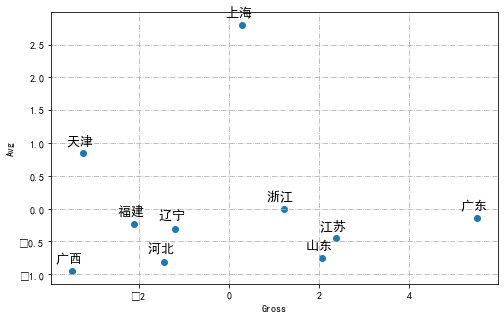

In [20]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体

x = scale_pca_cities['Gross']
y = scale_pca_cities['Avg']
label = scale_pca_cities['AREA']

plt.figure(figsize=(8,5))
plt.grid(linestyle='-.')
plt.scatter(x, y)
plt.xlabel('Gross')
plt.ylabel('Avg')
for a, b, l in zip(x, y, label):
    plt.text(a, b+0.1, '%s' % l, ha='center', va= 'bottom',fontsize=13)

plt.show()

In [21]:
#稀疏主成分分析 SparsePCA
alpha = 0.5
spca = SparsePCA(n_components=n_components, alpha=alpha)
spca.fit(scale_cities)
pd.DataFrame(spca.components_)

D:\Users\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


,0,1,2,3,4,5,6,7,8
0,2.520708,0.000000,2.592483,2.62422,2.600348,2.492157,2.60276,2.019878,2.488111
1,-0.026320,2.661756,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.161428


In [22]:
#选择合适的稀疏度
from functools import reduce

n_cols = scale_cities.shape[1]
spca_with_alpha = []

for i in np.arange(0.1, 1, 0.05):
    spca = SparsePCA(n_components=n_components, alpha=i)
    spca.fit(scale_cities)
    components_ = pd.DataFrame(spca.components_).T
    diff = np.count_nonzero(components_) - n_cols
    spca_with_alpha.append((i, diff))

selector = pd.DataFrame(spca_with_alpha)
selector.T

D:\Users\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)
D:\Users\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)
D:\Users\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)
D:\Users\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-com

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,0.7,0.75,0.8,0.85,0.9,0.95
1,5.0,4.00,4.0,4.00,4.0,4.00,3.0,2.00,2.0,1.00,1.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00


In [23]:
spca_ = SparsePCA(n_components=n_components, alpha=0.65).fit(scale_cities)
pd.DataFrame(spca_.components_)

D:\Users\Anaconda3\lib\site-packages\sklearn\decomposition\sparse_pca.py:170: DeprecationWarning: normalize_components=False is a backward-compatible setting that implements a non-standard definition of sparse PCA. This compatibility mode will be removed in 0.22.
  DeprecationWarning)


,0,1,2,3,4,5,6,7,8
0,2.365373,0.000000,2.443202,2.474257,2.452944,2.342823,2.450105,1.868462,2.356411
1,0.000000,2.512278,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
scale_spca_cities = pd.DataFrame(spca_.transform(scale_cities), columns=['Gross', 'Avg'])
scale_spca_cities

,Gross,Avg
0,-0.138360,-0.106220
1,0.247921,-0.152786
2,-0.165426,-0.241869
3,-0.385271,0.204952
4,0.281828,-0.058281
5,0.021453,0.841812
6,0.143375,0.016286
7,-0.246445,-0.088719
8,0.646481,-0.036560
9,-0.405557,-0.378616


D:\Users\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Users\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


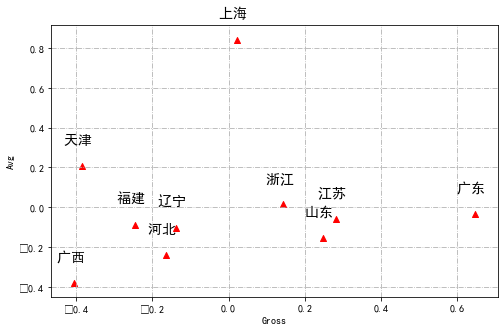

In [25]:
x = scale_spca_cities['Gross']
y = scale_spca_cities['Avg']
label = cities['AREA']

plt.figure(figsize=(8,5))
plt.grid(linestyle='-.')
plt.xlabel('Gross')
plt.ylabel('Avg')
plt.scatter(x, y, c='r',marker='^')
for a, b, l in zip(x, y, label):
    plt.text(a, b+0.1, '%s' % l, ha='center', va='bottom',fontsize=14)

plt.show()

In [30]:
#把ipynb转为py
try:    
    !jupyter nbconvert --to python SPCA_example.ipynb
    # python即转化为.py，script即转化为.html
    # file_name.ipynb即当前module的文件名
except:
    pass

[NbConvertApp] Converting notebook SPCA_example.ipynb to python
[NbConvertApp] Writing 2840 bytes to SPCA_example.py
